# Does Prestige Pay? Analyzing Tuition and School Rankings

### Problem Statement


This analysis will explore if there a correlation between student tuition and school ranking.

To analyze this, The following dataset will be utilized:
- A dataset containing rankings of schools worldwide for the 2024 and 2025 academic years.
- A dataset containing tuition costs and student enrollment sizes for various schools.

By combining these datasets, this analysis aims to investigate whether higher tuition correlates with better rankings.

## Gather Data

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files" method via Kaggle. 

Source: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025

Variables that will be used:

*   Variable 1 - Institution Name
*   Variable 2 - 2024 Rank

The dataset provides both 2024 2025 rankings. This analysis will only be utilizing 2024 rankings because it will analyze the correlation of tuition and rankings historically.

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests

In [2]:
world_rankings = pd.read_csv('/kaggle/input/worlds-best-universities-qs-rankings-2025/qs-world-rankings-2025.csv')
world_rankings.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


#### Dataset 2

Type: API

Method: The data was gathered using the "API" method from the College Scorecard.

Source: https://api.data.gov/ed/collegescorecard/v1/schools

Variables that will be used:

* Variable 1 Institution Name
* Variable 2 Out-Of-State Tuition
* Variable 3 In-State Tuition

In [3]:
api_key = "Etkbj9xHbH4F9HCntRvrplFS7sSGvyVlXQG11iym"
base_url = "https://api.data.gov/ed/collegescorecard/v1/schools"

In [4]:
#specify parameters
params = {
    "api_key": api_key,
    "fields": "id,school.name,school.state,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.student.size",  # Fields you want to extract
    "per_page": 100,  
    "page": 0  
}

In [5]:
#collect data
data_list = []  

while True:
    params["page"] += 1  
    response = requests.get(base_url, params=params)
    
    #check for errors
    if response.status_code != 200:
        break
    
    #parse JSON response
    data = response.json()
    
    #exit loop if no results
    if not data["results"]:
        break
    
    #append results list
    data_list.extend(data["results"])

In [6]:
#make data_list a dataframe
scorecard = pd.DataFrame(data_list)
scorecard.head()

,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.student.size,school.name,school.state,id
0,31650,31650,1028,Arizona Christian University,AZ,105899
1,0,0,1972,Universal Technical Institute of Arizona Inc,AZ,106041
2,2680,9340,3577,Yavapai College,AZ,106148
3,8366,18957,4802,University of Arkansas at Little Rock,AR,106245
4,0,0,1287,University of Arkansas for Medical Sciences,AR,106263


## Assess data

### Quality Issue 1:

In [7]:
scorecard.head()

,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.student.size,school.name,school.state,id
0,31650,31650,1028,Arizona Christian University,AZ,105899
1,0,0,1972,Universal Technical Institute of Arizona Inc,AZ,106041
2,2680,9340,3577,Yavapai College,AZ,106148
3,8366,18957,4802,University of Arkansas at Little Rock,AR,106245
4,0,0,1287,University of Arkansas for Medical Sciences,AR,106263


In [8]:
#find number of 0 values in in-state tuition column
(scorecard['latest.cost.tuition.in_state'] == 0).sum()

2692

In [9]:
#find number of 0 values in out-of-state tuition column
(scorecard['latest.cost.tuition.out_of_state'] == 0).sum()

2692

Issue and justification: There are values of zero in the tuition columns which will need to be removed to not provide an inacurate analysis.

### Quality Issue 2:

In [10]:
#find null values in world rankings
world_rankings[world_rankings.isnull().any(axis=1)]

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
382,383,427,Anna University,IN,India,L,10.0,12.0,5.5,100.0,NaN,1.3,89.2,5.9,24.7,30.6
439,440,429,Singapore University of Technology and Design,SG,Singapore,S,7.4,5.3,99.0,66.0,NaN,NaN,31.2,4.6,1.1,27
451,565,600,Nanjing University of Science and Technology,CN,China (Mainland),L,5.7,2.5,8.9,89.3,NaN,NaN,38.7,3.7,2.3,22
484,485,NaN,American University of Ras Al Khaimah ( AURAK ),AE,United Arab Emirates,S,4.6,3.3,35.5,46.8,100.0,100.0,15.4,4.1,1.1,24.8
490,489,NaN,Isfahan University of Technology,IR,"Iran, Islamic Republic of",M,4.9,15.7,5.1,92.2,2.3,1.4,43.5,5.6,1.1,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,1401+,1201-1400,Universidad Nacional del Comahue,AR,Argentina,XL,5.1,2.4,20.4,1.3,NaN,NaN,13.1,2.1,1.2,-
1482,1401+,1201-1400,Universidad Veracruzana,MX,Mexico,XL,7.7,2.7,7.3,1.4,NaN,NaN,13.6,1.5,1.1,-
1483,1401+,1401+,Universidade do Estado de Santa Catarina,BR,Brazil,XL,3.7,1.3,15.4,1.7,NaN,NaN,9.0,2.2,1.0,-
1488,1401+,1401+,Universidade Federal do Estado do Rio de Janei...,BR,Brazil,L,2.9,2.0,8.1,2.1,NaN,NaN,8.6,1.5,1.0,-


Issue and justification: There are null values in the ranking section for the 2024 year which will have to be removed to provide an accurate analysis.

### Quality Issue 3:

In [11]:
world_rankings.tail()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-
1502,1401+,1401+,Western Washington University,US,United States,L,2.6,2.6,7.3,3.5,9.7,1.6,12.4,1.5,1.1,-


Remove anything in 2025 rank column with 1400+ and anything from 2024 column with 1201-1400 and 1400+ for datatype consistency

### Tidiness Issue 1:

In [12]:
#Inspecting the dataframe visually
scorecard.head()

,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,latest.student.size,school.name,school.state,id
0,31650,31650,1028,Arizona Christian University,AZ,105899
1,0,0,1972,Universal Technical Institute of Arizona Inc,AZ,106041
2,2680,9340,3577,Yavapai College,AZ,106148
3,8366,18957,4802,University of Arkansas at Little Rock,AR,106245
4,0,0,1287,University of Arkansas for Medical Sciences,AR,106263


In [13]:
#view columns in scorecard
scorecard.columns

Index(['latest.cost.tuition.in_state', 'latest.cost.tuition.out_of_state',
       'latest.student.size', 'school.name', 'school.state', 'id'],
      dtype='object')

Issue and justification: The title school.name needs to be changed to Institution name. The titles latest.cost.tuition.in_state and latest.cost.tuition.out_of_state need to be changed for readability. 

### Tidiness Issue 2: 

In [14]:
#view data types in world_rankings
world_rankings.dtypes

2025 Rank                          object
2024 Rank                          object
Institution Name                   object
Location                           object
Location Full                      object
Size                               object
Academic Reputation               float64
Employer Reputation               float64
Faculty Student                   float64
Citations per Faculty             float64
International Faculty             float64
International Students            float64
International Research Network    float64
Employment Outcomes               float64
Sustainability                    float64
QS Overall Score                   object
dtype: object

Issue and justification: 2024/2025 rank are currently object and will have to be changed to integer.
Size column is currenty object and needs to be changed to category data type

## Clean data

In [15]:
# make copies of the datasets 
scorecard_copy = scorecard.copy()

In [16]:
world_rankings_copy = world_rankings.copy()

### **Quality Issue 1**

In [17]:
#scorecard - out-of-state tuition - replace '0' values with null
scorecard_copy['latest.cost.tuition.out_of_state'] = scorecard_copy['latest.cost.tuition.out_of_state'].replace(0, pd.NA)

#scorecard - in-state tuition - replace '0' values with null
scorecard_copy['latest.cost.tuition.in_state'] = scorecard_copy['latest.cost.tuition.in_state'].replace(0, pd.NA)

#scorecard - in-state tuition - drop rows with null values
scorecard_copy = scorecard_copy.dropna(subset=['latest.cost.tuition.in_state'])

#scorecard - out-of-state tuition - drop rows with null values
scorecard_copy = scorecard_copy.dropna(subset=['latest.cost.tuition.out_of_state'])

In [18]:
scorecard_copy = scorecard_copy.reset_index(drop=True)

In [19]:
#scorecard - in-state tuition - verify no 0 values
(scorecard_copy['latest.cost.tuition.in_state'] == 0).sum()

0

In [20]:
#scorecard - in-state tuition - verify no null values
scorecard_copy['latest.cost.tuition.in_state'].isnull().sum()

0

In [21]:
#scorecard - out-of-state tuition - verify no 0 values
(scorecard_copy['latest.cost.tuition.out_of_state'] == 0).sum()

0

In [22]:
#scorecard - out-of-state tuition - verify no null values
scorecard_copy['latest.cost.tuition.out_of_state'].isnull().sum()

0

Justification: Removed all null values from in-state and out-of-state columns because the zeros are missing data due to the fact that no college has free tuition.

### **Quality Issue 2**

In [23]:
#world_rankings - 2024 Rank - drop rows with null nalues
world_rankings_copy = world_rankings_copy.dropna(subset=['2024 Rank'])


#world_rankings - 2025 Rank - drop rows with null nalues
world_rankings_copy = world_rankings_copy.dropna(subset=['2025 Rank'])

In [24]:
#world_rankings - reset index
world_rankings_copy = world_rankings_copy.reset_index(drop=True)

In [25]:
#world_rankings - 2024 Rank - verify 0 null values
world_rankings_copy['2024 Rank'].isnull().sum()

0

In [26]:
#world_rankings - 2025 Rank - verify 0 null values
world_rankings_copy['2024 Rank'].isnull().sum()

0

Justification: Dropped any null values in the rank columns so they do not skew our data, unranked schools will not benefit our analysis.

### **Quality Issue 3**

In [27]:
world_rankings_copy.tail()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
1477,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1478,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1479,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1480,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-
1481,1401+,1401+,Western Washington University,US,United States,L,2.6,2.6,7.3,3.5,9.7,1.6,12.4,1.5,1.1,-


In [28]:
#world_rankings - 2025 Rank - remove any rows with - or + in them
world_rankings_copy = world_rankings_copy[~world_rankings_copy['2025 Rank'].str.contains(r'[-+]', na=False, regex=True)]

#world_rankings - 2024 Rank - remove any rows with - or + in them
world_rankings_copy = world_rankings_copy[~world_rankings_copy['2024 Rank'].str.contains(r'[-+]', na=False, regex=True)]

In [29]:
#world_rankings - reset index
world_rankings_copy = world_rankings_copy.reset_index(drop=True)

In [30]:
world_rankings_copy.tail()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
565,596,491,University of Iowa,US,United States,L,18.4,8.7,41.7,19.1,15.5,3.7,75.6,26.6,20.8,20.8
566,596,520,University of Texas Dallas,US,United States,L,13.1,15.9,3.4,43.3,9.7,47.4,60.4,4.9,9.5,20.8
567,508,595,Shenzhen University,CN,China (Mainland),XL,7.7,3.2,42.1,64.5,11.0,1.4,65.1,15.8,7.4,23.9
568,501,511,East China Normal University,CN,China (Mainland),L,13.3,4.7,16.2,63.5,24.1,9.0,72.0,9.0,6.8,24.1
569,497,502,Jilin University,CN,China (Mainland),XL,12.1,46.1,37.4,27.4,11.6,2.1,62.2,23.2,9.1,24.2


### **Tidiness Issue 1**

In [31]:
scorecard_copy.columns

Index(['latest.cost.tuition.in_state', 'latest.cost.tuition.out_of_state',
       'latest.student.size', 'school.name', 'school.state', 'id'],
      dtype='object')

In [32]:
world_rankings_copy.columns

Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Location',
       'Location Full', 'Size', 'Academic Reputation', 'Employer Reputation',
       'Faculty Student', 'Citations per Faculty', 'International Faculty',
       'International Students', 'International Research Network',
       'Employment Outcomes', 'Sustainability', 'QS Overall Score'],
      dtype='object')

In [33]:
#scorecard - rename in-state tuition column
scorecard_copy.rename(columns={'latest.cost.tuition.in_state': 'In-State Tuition'}, inplace=True)

#rename out of state tuition column
scorecard_copy.rename(columns={'latest.cost.tuition.out_of_state': 'Out-Of-State Tuition'}, inplace=True)

#rename student size column
scorecard_copy.rename(columns={'latest.student.size': 'Student Size'}, inplace=True)

#rename school.name column to match column in world_rankings df
scorecard_copy.rename(columns={'school.name': 'Institution Name'}, inplace=True)

#rename state column
scorecard_copy.rename(columns={'school.state': 'Location'}, inplace=True)

In [34]:
#verify column names
scorecard_copy.columns

Index(['In-State Tuition', 'Out-Of-State Tuition', 'Student Size',
       'Institution Name', 'Location', 'id'],
      dtype='object')

Justification: I renamed the column named school.name in scorecard to match the column name in world_rankings df for joining purposes. I renamed all other columns for redability and consistency purposes.

### **Tidiness Issue 2**

In [35]:
world_rankings_copy.dtypes

2025 Rank                          object
2024 Rank                          object
Institution Name                   object
Location                           object
Location Full                      object
Size                               object
Academic Reputation               float64
Employer Reputation               float64
Faculty Student                   float64
Citations per Faculty             float64
International Faculty             float64
International Students            float64
International Research Network    float64
Employment Outcomes               float64
Sustainability                    float64
QS Overall Score                   object
dtype: object

In [36]:
#world rankings - 2025 Rank - change to integer datatype
world_rankings_copy['2025 Rank'] = world_rankings_copy['2025 Rank'].astype(int)

#world rankings - 2025 Rank - change to integer datatype
world_rankings_copy['2024 Rank'] = world_rankings_copy['2024 Rank'].astype(int)

#world rankings - Student Size - change to category datatype
world_rankings_copy['Student Size'] = world_rankings_copy['Size'].astype('category')

In [37]:
world_rankings_copy.dtypes

2025 Rank                            int64
2024 Rank                            int64
Institution Name                    object
Location                            object
Location Full                       object
Size                                object
Academic Reputation                float64
Employer Reputation                float64
Faculty Student                    float64
Citations per Faculty              float64
International Faculty              float64
International Students             float64
International Research Network     float64
Employment Outcomes                float64
Sustainability                     float64
QS Overall Score                    object
Student Size                      category
dtype: object

Justification: Changed 2024 and 2025 Ranks to int data type for later numerical comparision. Changed Student Size to category data type because there are only a few variations between the entries in this column

### **Remove unnecessary variables and combine datasets**


In [38]:
world_rankings_copy.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score,Student Size
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100,M
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5,L
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9,L
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8,L
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7,L


In [39]:
#world_rankings - only keep 2024 Rank and Institution Name columns
world_rankings_copy = world_rankings_copy[['2024 Rank', 'Institution Name']]

#world_rankings - sort by rank for readablity
world_rankings_copy = world_rankings_copy.sort_values(by='2024 Rank')

#reset index
world_rankings_copy = world_rankings_copy.reset_index(drop=True)
world_rankings_copy.head()

,2024 Rank,Institution Name
0,1,Massachusetts Institute of Technology (MIT)
1,2,University of Cambridge
2,3,University of Oxford
3,4,Harvard University
4,5,Stanford University


In [40]:
scorecard_copy.head(1)

,In-State Tuition,Out-Of-State Tuition,Student Size,Institution Name,Location,id
0,31650,31650,1028,Arizona Christian University,AZ,105899


In [41]:
#scorecard - only keep Institution Name, In-State Tuition, Out-Of-State Tuition
scorecard_copy = scorecard_copy[['Institution Name', 'In-State Tuition', 'Out-Of-State Tuition']]
scorecard_copy.head()

,Institution Name,In-State Tuition,Out-Of-State Tuition
0,Arizona Christian University,31650,31650
1,Yavapai College,2680,9340
2,University of Arkansas at Little Rock,8366,18957
3,Arkansas Baptist College,8760,8760
4,Lyon College,31000,31000


In [42]:
#inner merge dfs on Institution Name
merged_df = pd.merge(world_rankings_copy, scorecard_copy, on='Institution Name', how='inner')

#create ranking tier columns for later comparison
merged_df['Ranking Tier'] = pd.cut(merged_df['2024 Rank'], bins=[0, 100, 500, 1000], labels=['1-100', '101-500', '501-1000'])

#verify changes
merged_df.head()

,2024 Rank,Institution Name,In-State Tuition,Out-Of-State Tuition,Ranking Tier
0,4,Harvard University,57261,57261,1-100
1,5,Stanford University,58416,58416,1-100
2,11,University of Chicago,64260,64260,1-100
3,12,University of Pennsylvania,63452,63452,1-100
4,13,Cornell University,63200,63200,1-100


## Update your data store

In [43]:
merged_df.to_csv("merged_data_cleaned.csv", index=False)

## Answer the research question: 
### Is there a correlation between student tuition and school ranking?

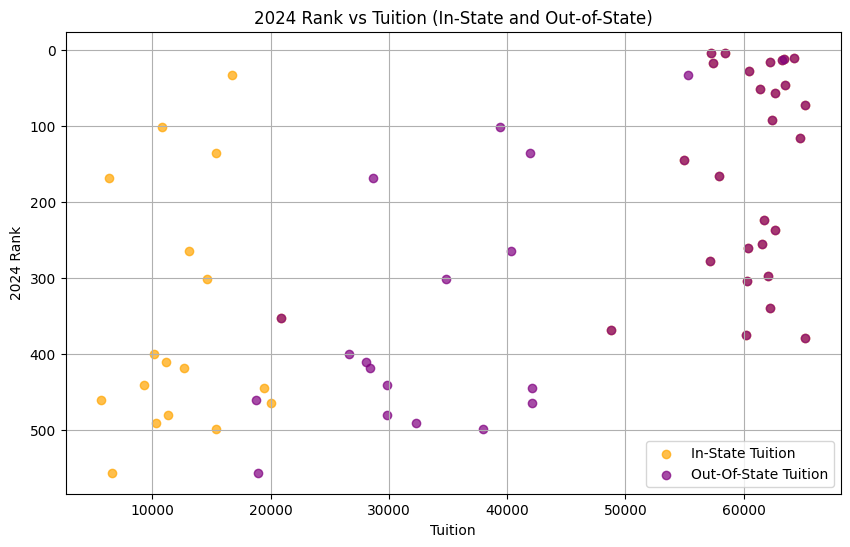

In [44]:
#create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['In-State Tuition'], merged_df['2024 Rank'], label='In-State Tuition', alpha=0.7, color='orange')
plt.scatter(merged_df['Out-Of-State Tuition'], merged_df['2024 Rank'], label='Out-Of-State Tuition', alpha=0.7, color='purple')
plt.xlabel('Tuition')
plt.ylabel('2024 Rank')
plt.title('2024 Rank vs Tuition (In-State and Out-of-State)')
plt.legend()
plt.gca().invert_yaxis()  #shows lower ranks (1+) higher on y-axis for better visual
plt.grid(True)
plt.show()

**Analysis of scatter plot:** 

The analysis reveals a positive corelation between student tuition and school ranking, which suggests schools with higher tuition fees generally tend to rank higher according to 2024 rankings. However the trend is not completely uniform across all data poinits. Notably there are a two schools with lower tution that rank within the top 100.

These outliers indicate that while tuition may reflect resources and prestige, other factors such  as public funding, regional policies or exceptional acedmic performance cold play a significant role in the high ranking. This highlights that tuition alone is not the sole determinant of a school's position in the rankings.

/tmp/ipykernel_17/2904444338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tuition_by_tier = merged_df.groupby('Ranking Tier')[['In-State Tuition', 'Out-Of-State Tuition']].mean().reset_index()


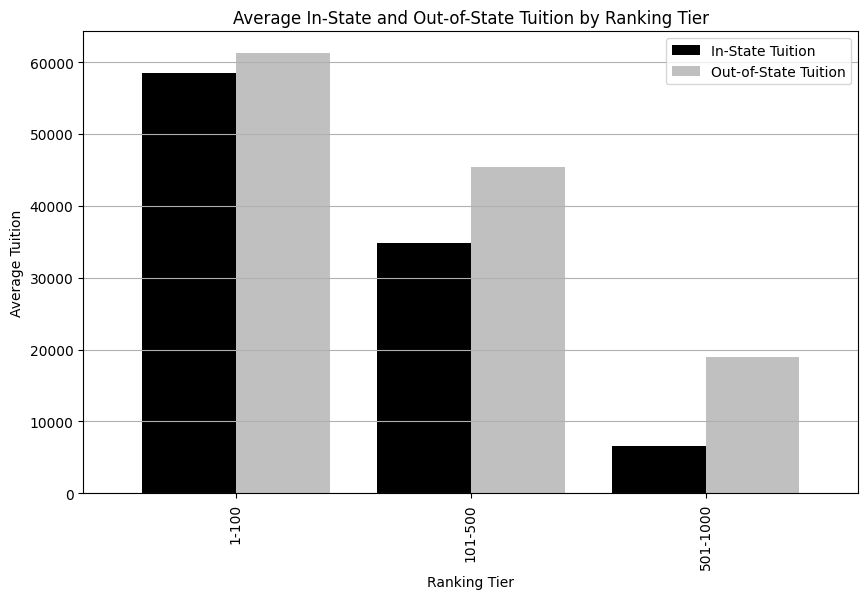

In [45]:
#group by ranking tier and calculate average for tuitions
tuition_by_tier = merged_df.groupby('Ranking Tier')[['In-State Tuition', 'Out-Of-State Tuition']].mean().reset_index()

#plot the averages for each tuition type
tuition_by_tier.plot(
    x='Ranking Tier',
    kind='bar',
    figsize=(10, 6),
    width=0.8,
    color=['black', 'silver'],  #black = in-state, silber=out-of-state
)

#add labels and title
plt.title('Average In-State and Out-of-State Tuition by Ranking Tier')
plt.ylabel('Average Tuition')
plt.xlabel('Ranking Tier')
plt.grid(axis='y')
plt.legend(['In-State Tuition', 'Out-of-State Tuition'])
plt.show()

**Analysis of distribution chart:** 

While there is a general trend of higher tuition being associated with higher rankings, the inconsistency in the lower-tier group highlights that the relationship is not strictly linear. This anomaly also suggests that factors other than tuition play a role in school rankings.

### Reflection

Further analysis to obtain a more comprehensive understanding of the correlation between tuition and rankings could include:

* Exploring the impact of other factors on school rankings, such a funding, faculty quality and student outcomes
* Exploring the potentional regional or institutional factors that could influence tuition rates and/or rankings
* Obtaining the exact rankings of the schools that were removed when rankings with + or - where removed